# Exploratory Data Analysis of Brent Oil Prices

This notebook performs initial exploratory data analysis (EDA) on historical Brent oil price data to understand its time-series characteristics and prepare for change point analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("../data/brentoilprices.csv")
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.info()


C:\Users\hp\AppData\Local\Temp\ipykernel_16820\3524576106.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB


The Date column is converted to a datetime format and set as the index to enable proper time-series analysis and visualization.


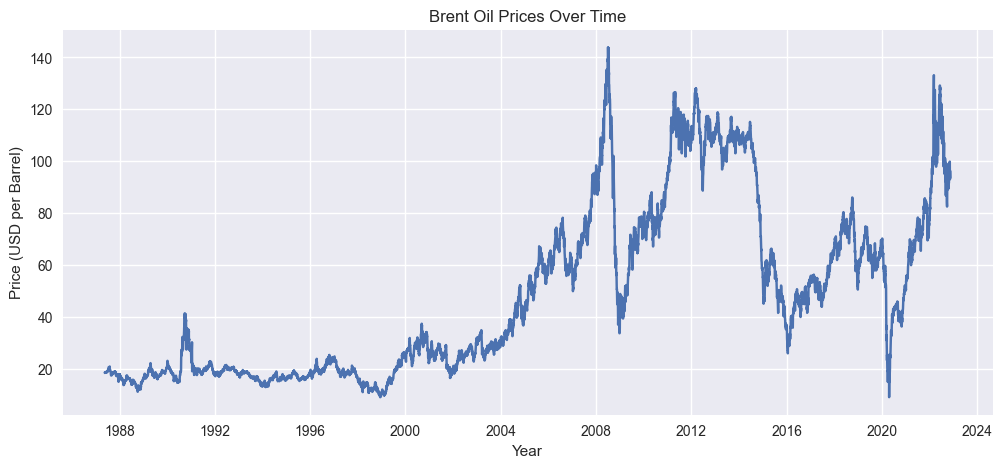

In [4]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Price'])
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Year")
plt.ylabel("Price (USD per Barrel)")
plt.show()


### Observations from Raw Price Series

- The series exhibits long-term trends rather than a constant mean.
- There are sudden price spikes and drops, indicating potential structural breaks.
- Periods of high volatility are clustered, especially during major global events.
- These characteristics suggest non-stationarity in the raw price series.


In [5]:
import numpy as np

df['log_return'] = np.log(df['Price']).diff()
df[['log_return']].dropna().head()


,log_return
Date,
1987-05-21,-0.009709
1987-05-22,0.005405
1987-05-25,0.002692
1987-05-26,0.001612
1987-05-27,-0.001612


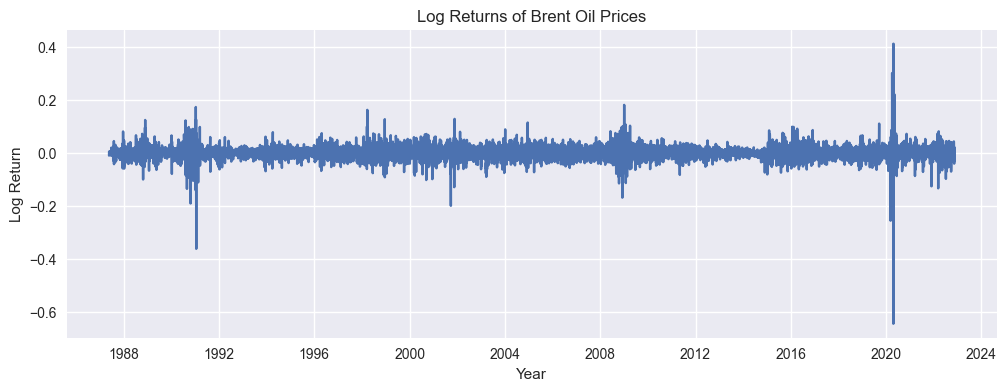

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['log_return'])
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()


### Log Return Analysis

- Log returns fluctuate around a stable mean, suggesting improved stationarity.
- Volatility clustering is visible, with calm and turbulent periods.
- These properties make log returns more suitable for statistical modeling and change point detection.


### Motivation for Change Point Analysis

Given the presence of structural breaks, volatility clustering, and non-stationarity in oil prices, change point analysis is appropriate to identify statistically significant shifts in the underlying data-generating process.
These shifts may correspond to major geopolitical or economic events.
